# Chapter 11 - Working with unlabeled data - Clustering Analysis

## Grouping objects by similarity using k-menas

K-means is one of the most popular clustering algorithms. Clustering is a technique to find groups of similar objects (more related to each other than to other groups). For example for grouping documents, music by topics etc.

k-means belongs to a category of prototype-based clustering (other categories include hierarchical and density-based clustering). Prototype-based means that each cluster is represented by a prototype; either a centroid (average) or medoid (most representative or most frequently occuring point). The downside of k-means is that the number of groups (k) has to be predefined. The elbow method and silhouette plots can help define the optimal k, which will be later discussed.

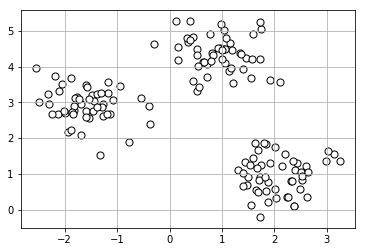

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150,
                 n_features = 2, 
                 centers = 3,
                 cluster_std = 0.5,
                 shuffle = True,
                 random_state = 0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c= 'white', marker = 'o', edgecolor = 'black', s = 50)
plt.grid()
plt.show()

Steps of the k-means algorithm
* Randomly pick k centroids from the sample points as initial cluster centers
* Asssign each sample to the nearest centroid
* Move the centroids to the center of the samples that were assigned to it
* Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached

We have to define how to measure similarity between objects; similarity is the inverse of distance (which is often calculated as the Euclidean distance). Based on this distance we can see k-means as a siple optimization problem; an iterative approach for minimizing the within-cluster Sum of Squared Errors (SSE), also called cluster inertia.

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
           init = 'random',
           n_init = 10, #reiterate with 10 random initialized centroids (and take model with lowest SSE)
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

K-means stops if it converges before a maximum number of iterations. Sometimes it does not reach convergence and choosing a high max_iter can be computationally expensive in these cases. Larger values of tol can be used to deal with convergence problems.
Clusters can be empty, however the scikit implementation then searches for the point with the farthest distance to the cluster and reassign it.

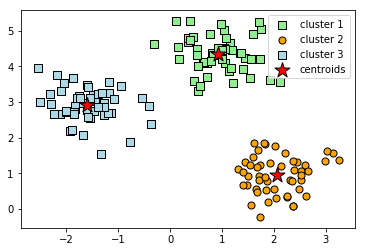

In [5]:
plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s = 50, c= 'lightgreen',
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')

plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50, c= 'orange',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')

plt.scatter(X[y_km == 2, 0],
           X[y_km == 2, 1],
           s = 50, c= 'lightblue',
           marker = 's', edgecolor = 'black',
           label = 'cluster 3')

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250, marker = '*',
           c = 'red', edgecolor = 'black',
           label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.grid()
plt.show()

Assumptions of the k-means algorithm that can limit value of the algoritm: k has to be set a priori, we assume that clusters do not overlap and are not hierarchical and we assume that there is at least one iteam in each cluster. Other types of clustering (hierarchical or density-based clustering) can overcome some of these problems and will be discussed later.

K-means++ does not adress these 'problems', but can greatly improve performance of k-means. K-means++ does not choose the centroids randomly, but places the initial centroids far from eachother. To use k-means++ the object in sklearn has to be set with parameter init='k-mean++'.

### Hard versus soft clustering

K-means is an example of hard clustering; each datapoint is assigned to a single cluster. In soft clustering all datapoints can be appointed to multiple clusters. Soft clustering is also called fuzzy clustering and a popular algorithm is the fuzzy C-means (also called soft k-means or fuzzy k-means) algorithm. Hereby each datapoint is assigned a probability of membership of each cluster; the sum of the probabilities for all clusters is 1. 

Steps:
* specify the number of k centroids and randomly assign the cluster memberships for each point
* Compute the cluster centroids
* Updat ehte cluster memberships for each point
* Repeat septs 2 and 3 until the membership coefficients do not change, or a user-defined tolerance or maximum number of iterations is used.

FCM is computational more expensive than k-means and often yield similar results. In FCM the parameter m controls the degree of fuzziness. FCM is not (yet) implemented in scikitlearn.

## Elbow method for finding the optimal # of clusters.

We cannot evaluate the performance of the model as we don't have supervised labels. To quantify the quality of clustering, we need to use intrinsic metrics - such as the within-cluster SSE (distortion) that we discussed earlier - to compare the performance of different k-means clusterings. Conveniently, we don't need to compute the within-cluster SSE explicitly when we are using scikit-learn, as it is already accessible via the inertia_ attribute after fitting a K-means model.

In [10]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


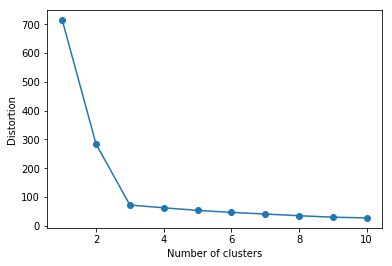

In [11]:
#Elbow method is a graphical tool to estimate the optimal number of clusters k for a given task.
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

the elbow is located at k=3, so 3 is a good value for this dataset.

## Quantifying the quality of clustering via silhouette plots

Another intrinsic evaluation method for clustering is silhouette analysis, which can also be applied to other clustering algorithms than k-means. It can be used as a graphical tool to assess how tightly grouped the samples in the clusters are. The following steps calculate the silhouette coefficient:
* 1) Calculate the cluster cohesion as the average distance between a sample xi and all other points in the same cluster
* 2) Calculate the cluster separation from the next closest cluster as the average distannce between sample xi and all samples in the nearest cluster.
* 3) Calculate the silhouette as the difference between cluster cohesion and seperation divided by the greater of the two ((b-a)/max{b,a})

Silhouette coefficient is in the range -1 to 1.if separation and cohesion are similar, we get close to 0. we get close to 1 if b>>a, since b quantifies the dissimilarity of a sample to other clusters and a describes the similarity of samples in the same cluster.

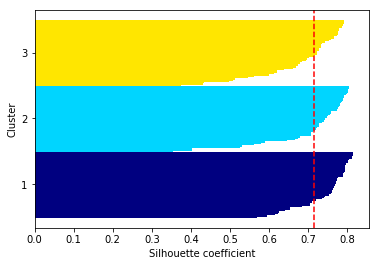

In [12]:
#create a plot of the silhouette coefficients for a k-means clustering with k = 3
km = KMeans(n_clusters = 3, init = 'k-means++',
           n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
#is per cluster the silhouette for each sample.

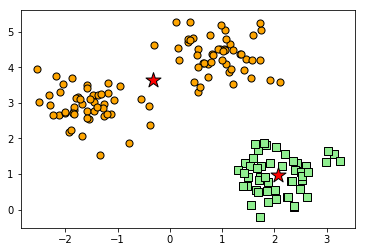

In [14]:
#Sample for bad clustering (k= 2)
km = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10,
           max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s = 50, c= 'lightgreen',
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')

plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50, c= 'orange',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250, marker = '*',
           c = 'red', edgecolor = 'black',
           label = 'centroids')

plt.grid()
plt.grid()
plt.show()

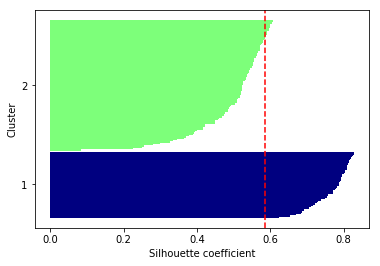

In [15]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
#is per cluster the silhouette for each sample.

## Organizing clusters as a hierarchical tree

Hierarchical clustering is an alternative to prototype-based clustering. An advantage is that it allows us to plot dendograms, which can help with the interpretation of the results by creating meaningful taxonomies. We also don't need to specify the number of clusters.

* <b>Divisive</b> hierarchical clustering; we start with one cluster that encompassess all samples and iteratively split the cluster into smaller clusters until each cluster only contains one sample.
* <b>Agglomerative</b> hierarchical clustering; opposite approach by starting with each sample as an individaaul cluster and merging the closest pairs together until one cluster remains.

Agglomerative clustering has two standard algoritms; single linkage (compute the distances between the most similar members and merge the two clusters with the smallest similar distance) or complete linkage (inverse; so merge the points with the least dissimilarities).
Steps for agglomerative hierarchical clustering using complete linkage:
* 1) Compute the distance matrix of all samples
* 2) Respresent each data point as a singleton cluster
* 3) Merge the two closest clusters based on the distance between the most dissimilar (distant) members.
* 4) Update the similarity matrix
* 5) Repeat steps 2-4

In [17]:
#generate random sample data to work with
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3]) * 10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [23]:
#Calculate distance matrix
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(  
            pdist(df, metric = 'euclidean')), 
            columns = labels, index = labels)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [25]:
#Read documentation; linkage needs a upper triangular distance matrix or complete input sample matrix
from scipy.cluster.hierarchy import linkage
#NOT row_clusters = linkage(row_dist, method = 'complete', metric = 'euclidean')
row_clusters = linkage(pdist(df, metric = 'euclidean'), method = 'complete')
#OR
row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')

In [26]:
#Closer look at the linkage results
pd.DataFrame(row_clusters,
            columns = ['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


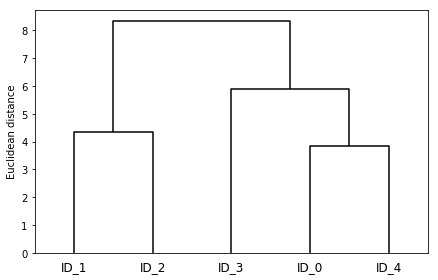

In [29]:
#visualize the results as dendogram
from scipy.cluster.hierarchy import dendrogram
# make dendogram black (part 1/2)
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])


row_dendr = dendrogram(row_clusters,
                     labels = labels,
                     #make dendogram black (part 2/2)
                     color_threshold= np.inf
                     )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### Attaching dendograms to a heat map

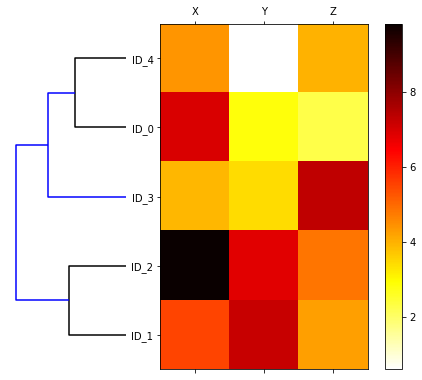

In [38]:
#create a figure object and define the x axis position, y axis position, width and height of dendrogram via add_axes
# and rotate dendrogram 90 degrees.
fig = plt.figure(figsize = (8,8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'left')

#reorder the data in our initial dataframe according to the clustering labels via the leaves key of the dendrogram
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

#construct heatmap from the reorderd Dataframe and position it next to dendorgram
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                 interpolation = 'nearest', cmap = 'hot_r')

#modify aesthetics of the dendrogram by removing the axis ticks and hig the axis spines and add color bar
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Applying agglomerative clustering via scikit-learn

In [41]:
#3 clusters
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3,
                            affinity = 'euclidean',
                            linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [42]:
#2 clusters
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2,
                            affinity = 'euclidean',
                            linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## Locating regions of high density via DBSCAN

Density-based Spatial Clustering of Applications with Noise (DBSCAN) assigns cluster labels based on dense regions of points. Density is hereby explaiend as number of points with a specified radiu.

* A point is considered a core point if at least a specified number (MinPts) of neighboring points fall within the specified radius.
* A border point is a point that has fewer neighbors than MinPts within the radius, but lies with the radius of a core point
* A noise point is neither a core nor a border point.

steps:
* 1) Form a seperate cluster for each core point or connected froup of core points (core points are connected if they are within a radius of eachother).
* 2) Assign each border point to the cluster of its corresponding core point.

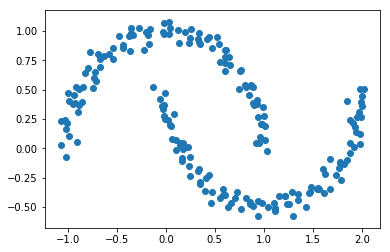

In [44]:
#Create a new dataset of half-moon-shaped structures to compare k-means, hierarchical clustering and DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200,
                 noise = 0.05,
                 random_state = 0)
plt.scatter(X[:,0], X[:,1])
plt.show()

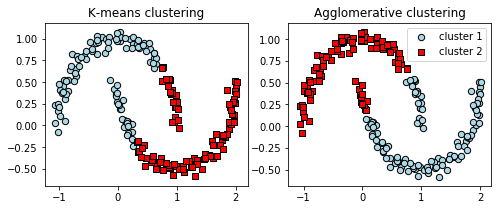

In [45]:
#Clustering by k-means and hierarchical clustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,3))
km = KMeans(n_clusters = 2,
           random_state = 0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           c = 'lightblue',
           edgecolor= 'black',
           marker = 'o',
           s = 40, label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           c = 'red',
           edgecolor= 'black',
           marker = 's',
           s = 40, label = 'cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters = 2,
                            affinity = 'euclidean',
                            linkage = 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
           X[y_ac == 0, 1],
           c = 'lightblue',
           edgecolor= 'black',
           marker = 'o',
           s = 40, label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0],
           X[y_ac == 1, 1],
           c = 'red',
           edgecolor= 'black',
           marker = 's',
           s = 40, label = 'cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

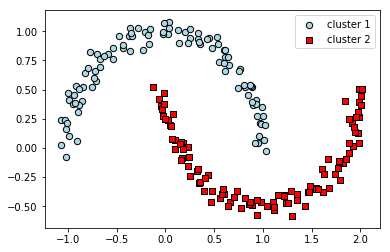

In [46]:
#DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,
           min_samples = 5,
           metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
           X[y_db == 0, 1],
           c = 'lightblue',
           edgecolor= 'black',
           marker = 'o',
           s = 40, label = 'cluster 1')
plt.scatter(X[y_db == 1, 0],
           X[y_db == 1, 1],
           c = 'red',
           edgecolor= 'black',
           marker = 's',
           s = 40, label = 'cluster 2')

plt.legend()
plt.show()

DBSCAN is better than k-means or hierarchical clustering, however has also some disadvantages. With increasing number of features in our dataset, the negative effect of the curse of dimensionality , however is not unique to DBSCAN (also affects k-means and hierarchical clustering algorithms that use the euclidean distance); sometimes it is valuable to decrease the number of dimensions by dimensionality reduction techniques. DBSCAN has two hyperparameters (radius and MinPts) that have to be optimized.